In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import mixture
import itertools
from scipy import linalg

##data loaded
data=pd.read_csv('chocolate_bars.csv',index_col=0)
data.head(-5)
##filing the missing datas
#filling the missing tables with the most common ingredients
data['ingredients'].fillna(data['ingredients'].mode()[0], inplace=True)
data['num_ingredients'].fillna(data['num_ingredients'].mode()[0], inplace=True)
#print(data)

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))
        
#Binning the rating column
cut_labels = ['really bad', 'bad', 'ok', 'good']
cut_bins = [0, 0.99,1.99,2.99,4.0]
data['rating'] = pd.cut(data['rating'], bins=cut_bins, labels=cut_labels)


#creating the testing and training variables
x=data.drop("rating",axis=1)
y=data["rating"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, x_test.shape

# Normalize feature data
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Saving the feature names 
features = x.columns.tolist()

import time
startTime = time.time()
##Decision tree
dt=DecisionTreeClassifier(max_depth=5,random_state=42,criterion="gini",splitter="best",min_samples_split=10,max_leaf_nodes=15)
dt.fit(x_train,y_train)


# Extracting the importances by sklearn 
importances_sk = dt.feature_importances_
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)
    
print(f"Feature importance by sklearn: {feature_importance_sk}")



#Evaluate the accuracy of the model
y_pred = dt.predict(x_test)
predictions = metrics.accuracy_score(y_test, y_pred)
#Calculating the accuracy in percentage
print('The accuracy is: ', predictions * 100, '%')
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Feature importance by sklearn: {'manufacturer': 0.0, 'company_location': 0.139, 'year_reviewed': 0.086, 'bean_origin': 0.0, 'bar_name': 0.068, 'cocoa_percent': 0.164, 'num_ingredients': 0.0, 'ingredients': 0.152, 'review': 0.39}
The accuracy is:  77.86561264822134 %
Execution time in seconds: 0.015625953674316406


In [2]:
#creating reduced vectors
x=data.drop(columns=['rating', 'manufacturer','bean_origin','num_ingredients'])
y=data["rating"]

C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory lea

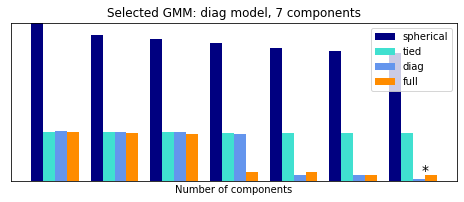

C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory lea

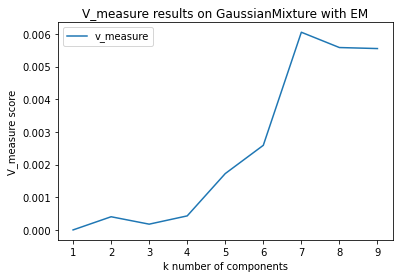

In [3]:
X=x
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type,random_state=42
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)
'''
# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
'''
plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

'''
metrics.v_measure_score(labels_true, labels_pred)
'''
labels_true=y
v_measure_list=[]
for k in range(1,10):
    clusterer = mixture.GaussianMixture(n_components=k, covariance_type="spherical",random_state=42)
    labels_pred = clusterer.fit_predict(X)
    score=metrics.v_measure_score(labels_true, clusterer.predict(X))
    v_measure_list.append(score)

k_clusters=[k for k in range(1,10)]
fig, ax1=plt.subplots()
ax1.plot(k_clusters, v_measure_list,label="v_measure")
ax1.set_title('V_measure results on GaussianMixture with EM')
ax1.set_xlabel('k number of components')
ax1.set_ylabel('V_measure score')
ax1.legend()
plt.show()